[0, 24.0, 30, 50, 60.0, 512.0]


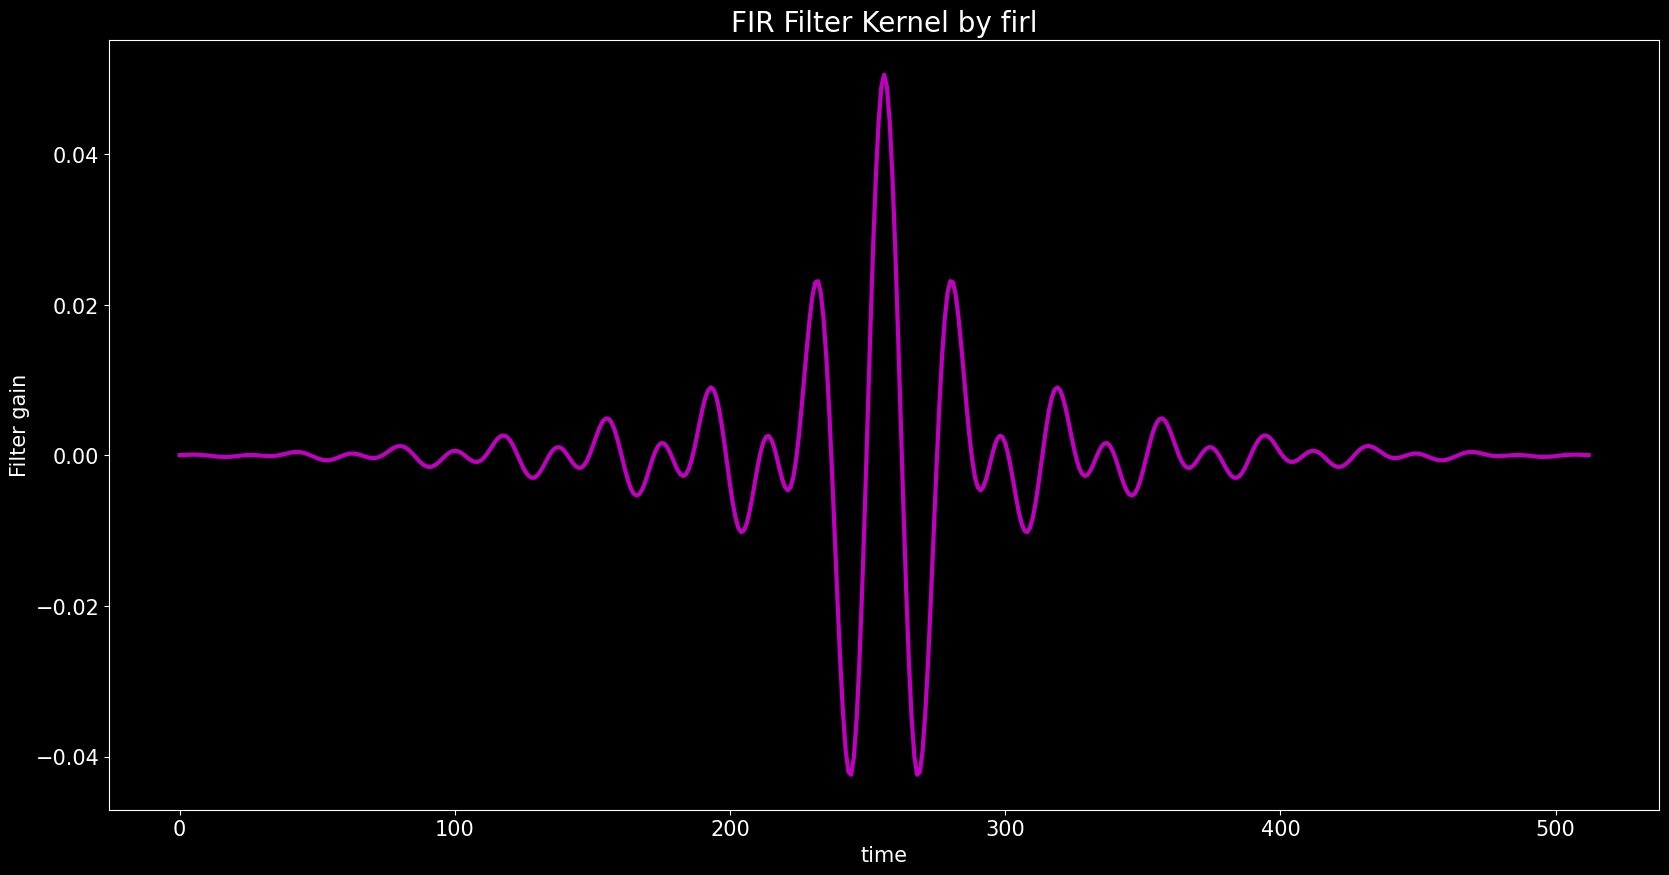

In [26]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
from matplotlib import style
from scipy import signal
srate=1024
Nyquist=srate/2
cutoff=[30,50] #there are 2 cutoff frequencies lower and upper cutoff frequencies
transw=0.2# transition width is 23%
order=int(15*srate/cutoff[0]) #Order parameter is important .Here order is taken as 9 times the sampling rate
#and then divide with lowest frequency.Order of filter also called taps
#Order Must be odd
if order %2==0:
    order+=1
#Other filter specifications
desired_shape=[0,0,1,1,0,0]
frequencies=[0,cutoff[0]-cutoff[0]*transw,cutoff[0],cutoff[1],cutoff[1]+cutoff[1]*transw,Nyquist]
print(frequencies)
filt_kernal=signal.firls(order,frequencies,desired_shape,fs=srate)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(filt_kernal,'m',linewidth=3)
plt.xlabel('time',fontsize=15)
plt.ylabel('Filter gain',fontsize=15)
plt.title('FIR Filter Kernel by firl',fontsize=20)
plt.show()




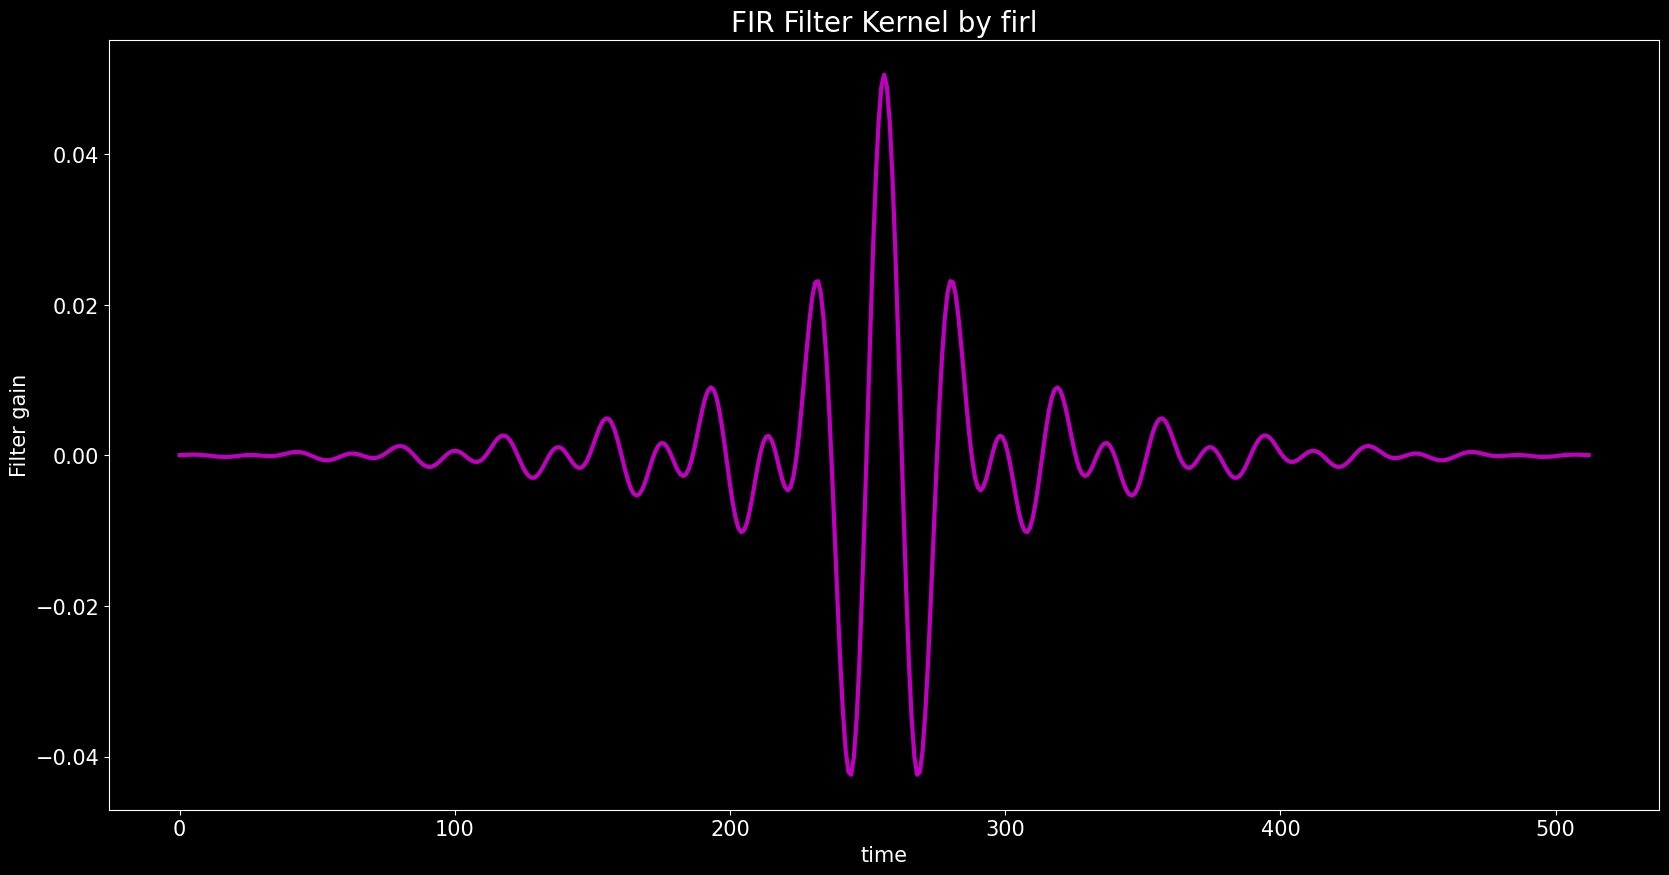

In [27]:
filt_kernal=signal.firls(order,frequencies,desired_shape,fs=srate)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(filt_kernal,'m',linewidth=3)
plt.xlabel('time',fontsize=15)
plt.ylabel('Filter gain',fontsize=15)
plt.title('FIR Filter Kernel by firl',fontsize=20)
plt.show()

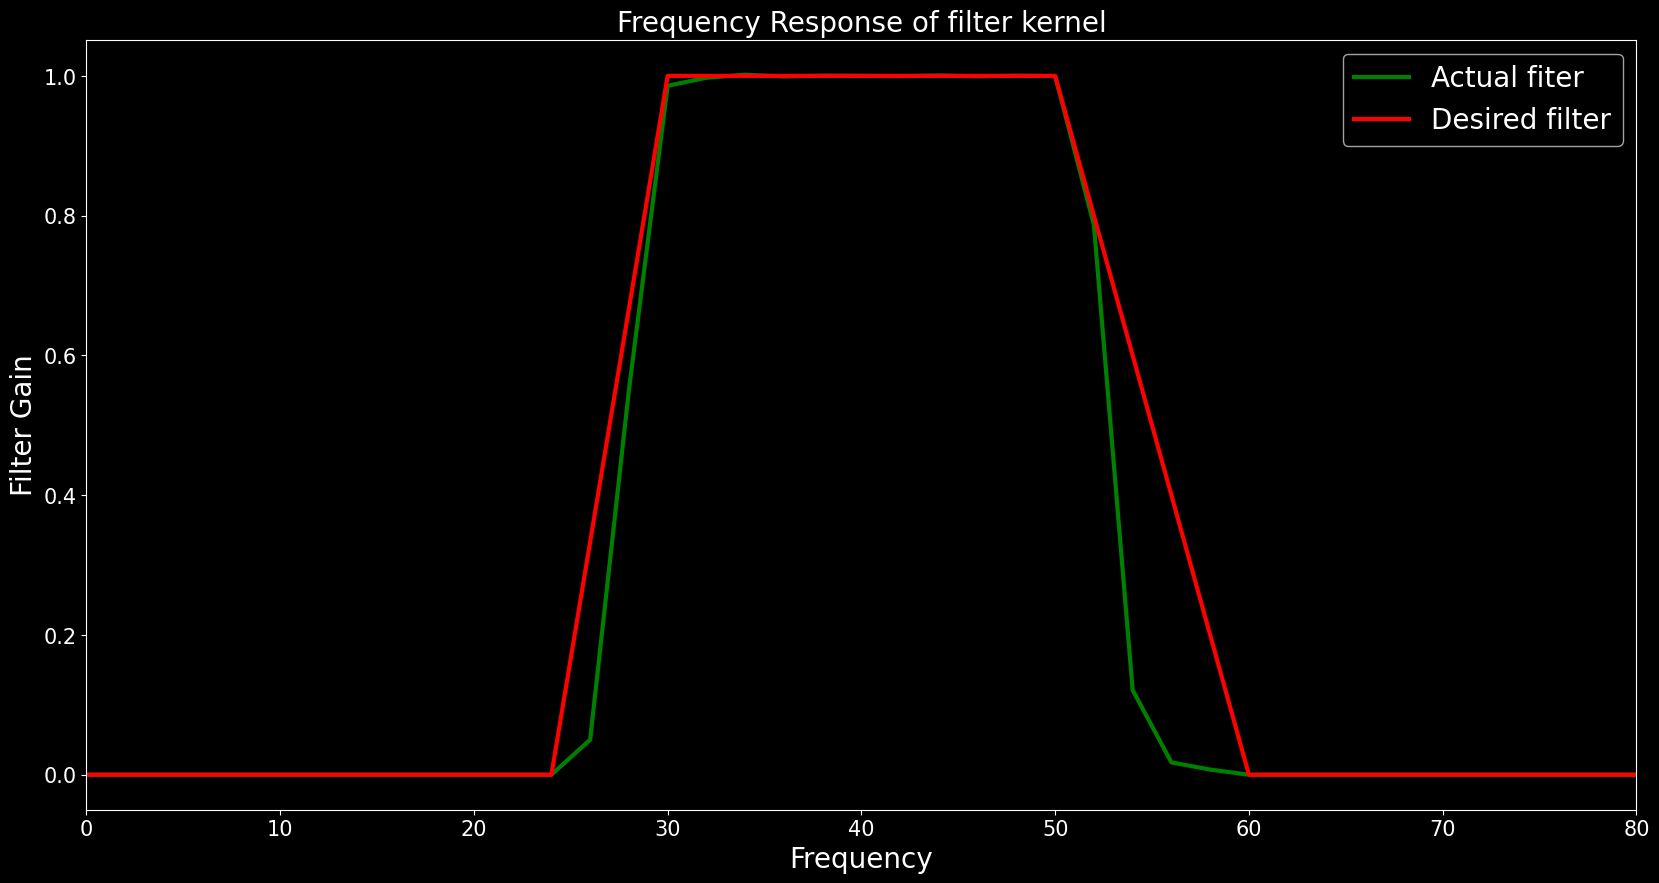

In [28]:
kernel_power=np.abs(scipy.fft.fft(filt_kernal))**2
Hz=np.linspace(0,srate/2,int(np.floor(len(filt_kernal)/2)+1))
kernel_power=kernel_power[0:len(Hz)]
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(Hz,kernel_power,'g',linewidth=3,label='Actual fiter')
plt.plot(frequencies,desired_shape,'r',linewidth=3,label='Desired filter')
plt.xlim([0,80])
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Filter Gain',fontsize=20)
plt.legend(fontsize=20)
plt.title('Frequency Response of filter kernel',fontsize=20)
plt.show()

In [29]:
#defining filter parameters for BandPass filter
srate=1024
Nyquist=srate/2
cutoff=[30,50]
order=int(15*srate/cutoff[0])
if order%2==0:
    order+=1
desired_shape1=[0,0,1,1,0,0]
frequencies=[0,cutoff[0],cutoff[0],cutoff[1],cutoff[1],Nyquist]
print(frequencies)



[0, 30, 30, 50, 50, 512.0]


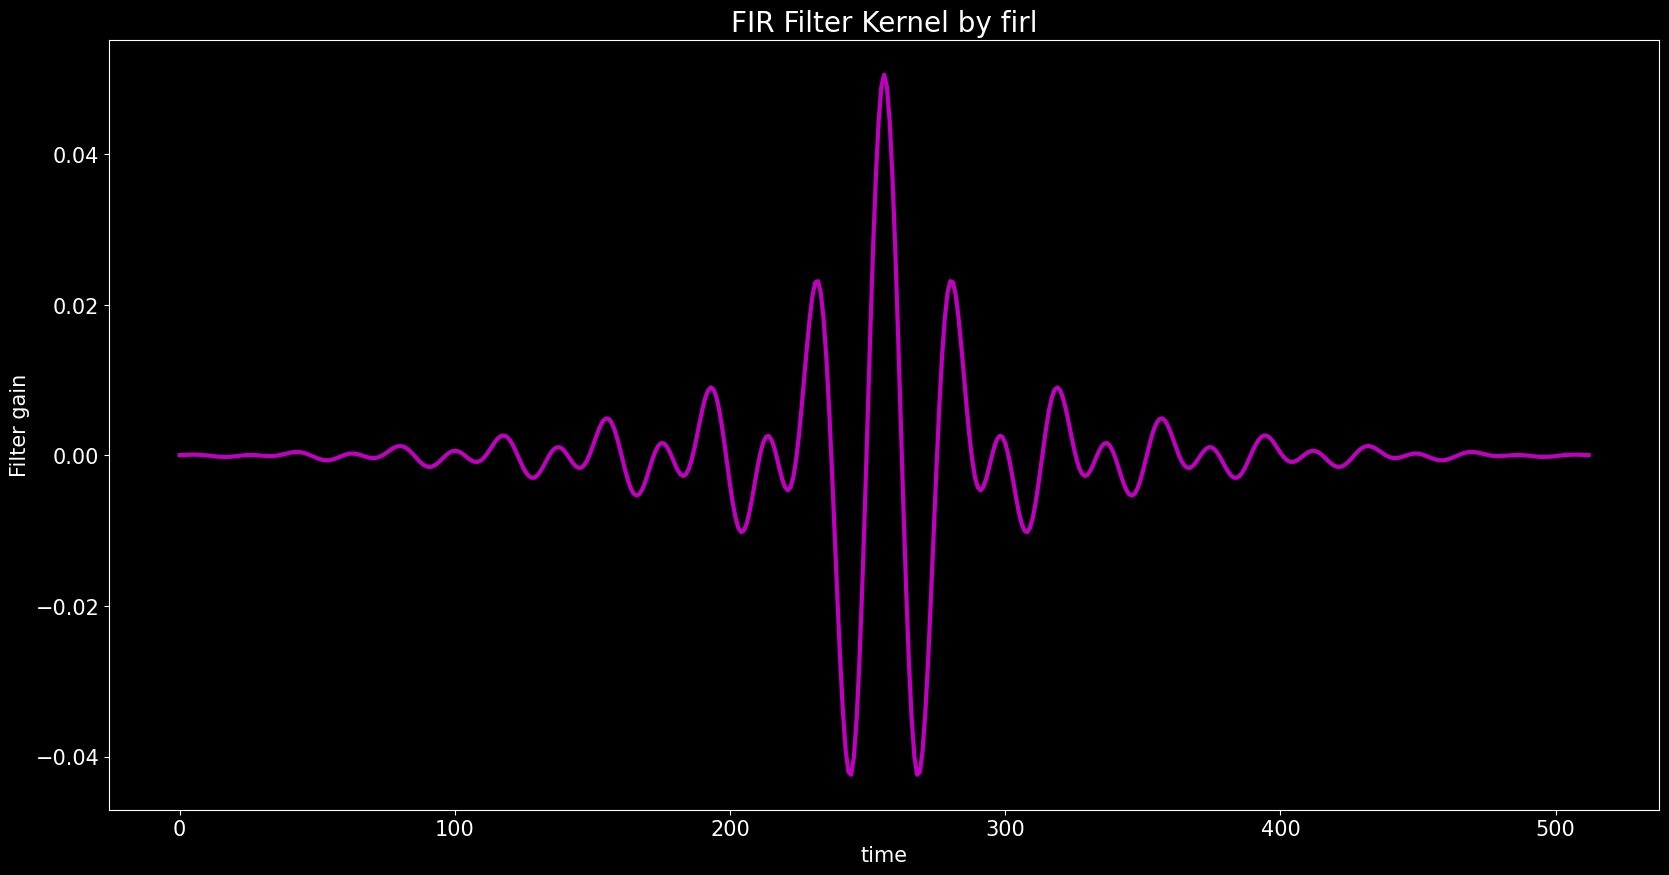

In [30]:
filt_kernel=signal.firwin(order,cutoff,fs=srate,pass_zero=False)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(filt_kernal,'m',linewidth=3)
plt.xlabel('time',fontsize=15)
plt.ylabel('Filter gain',fontsize=15)
plt.title('FIR Filter Kernel by firl',fontsize=20)
plt.show()


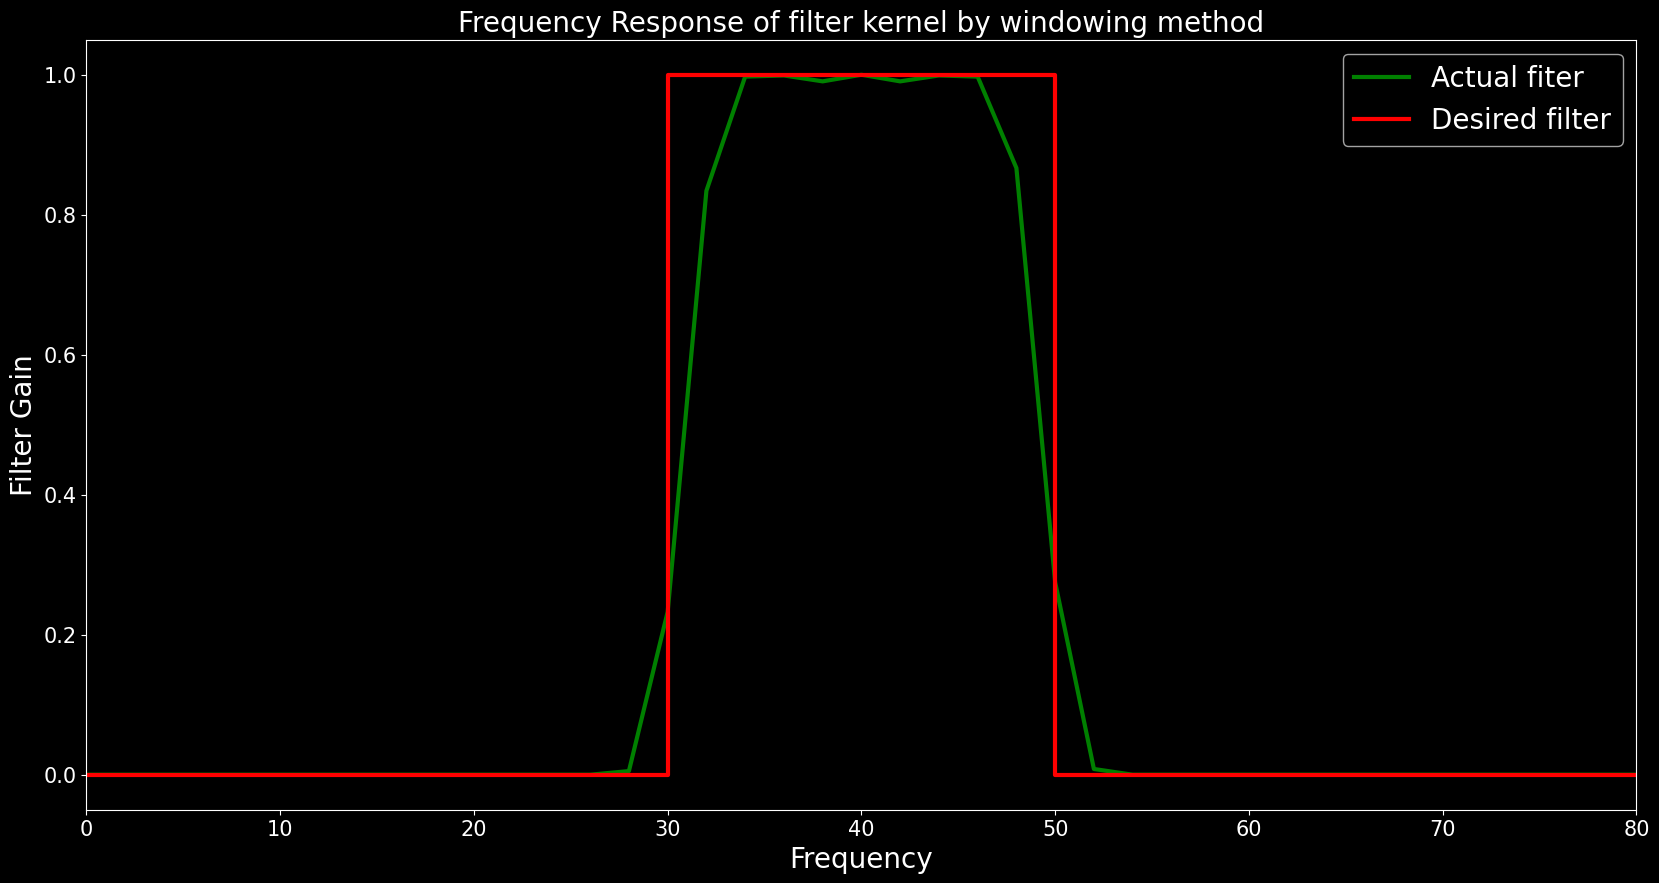

In [31]:
kernel_power=np.abs(scipy.fft.fft(filt_kernel))**2
Hz=np.linspace(0,srate/2,int(np.floor(len(filt_kernel)/2)+1))
kernel_power=kernel_power[0:len(Hz)] #firwin generates filter having no transition width.No shape input
plt.figure(figsize=(20,10)) #if True ,the gain at the frequency 0 (ie..,'DC gain') is 1 ,if false dc gain is 0  
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(Hz,kernel_power,'g',linewidth=3,label='Actual fiter')
plt.plot(frequencies,desired_shape,'r',linewidth=3,label='Desired filter')
plt.xlim([0,80])
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Filter Gain',fontsize=20)
plt.legend(fontsize=20)
plt.title('Frequency Response of filter kernel by windowing method',fontsize=20)
plt.show()

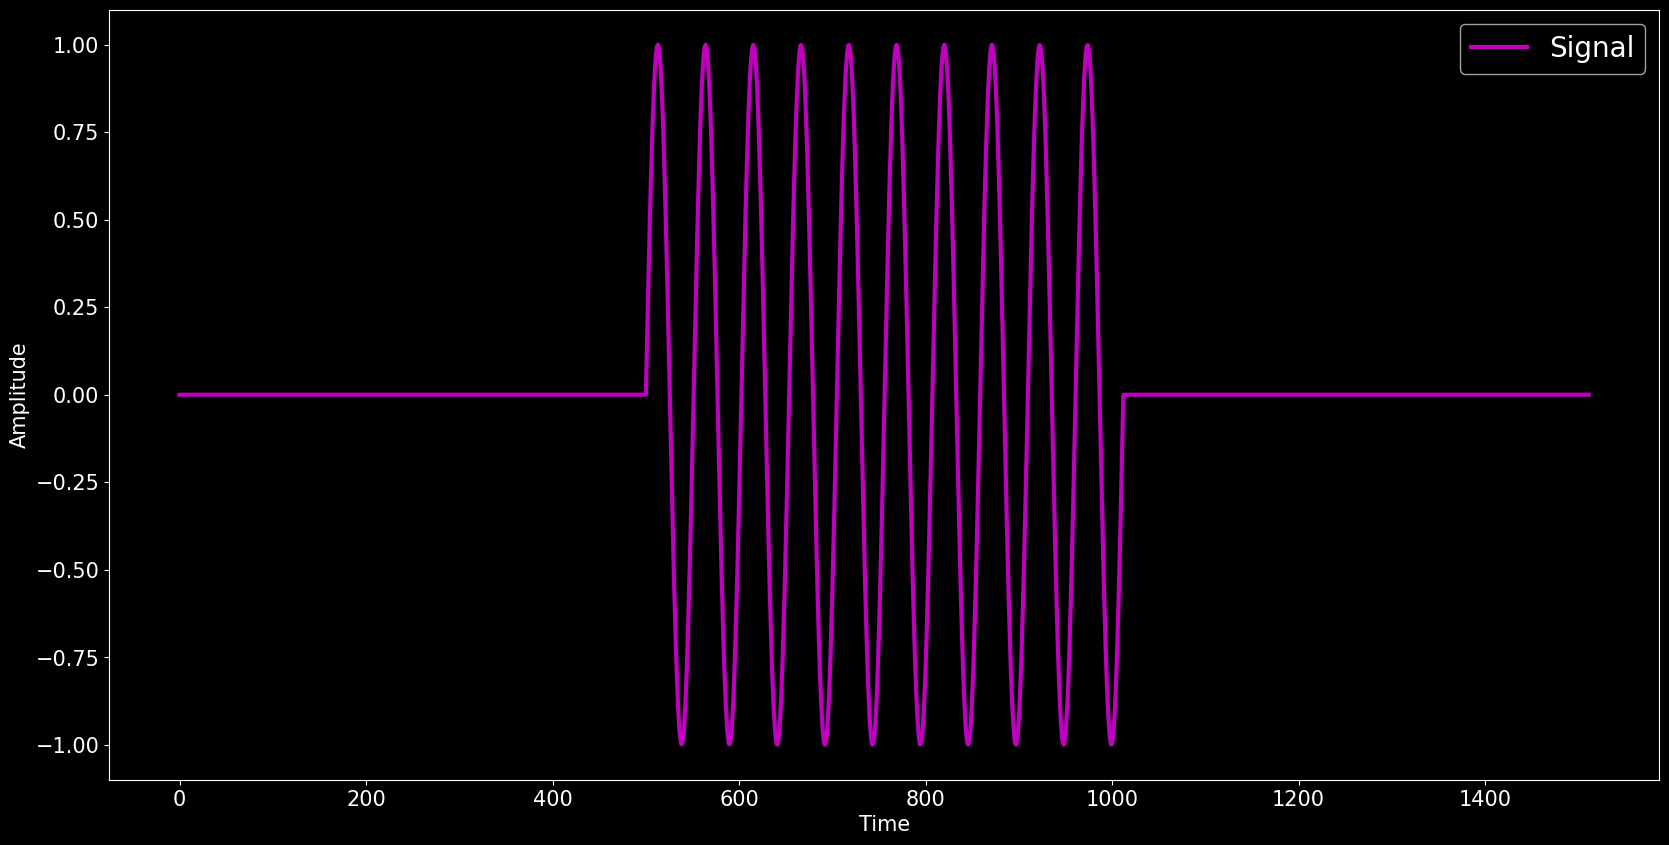

In [ ]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
from scipy import signal
srate=512
t=np.arange(0,1,1/srate)
pnts=len(t)
Nyquist=srate/2
x=np.concatenate((np.zeros(500),np.sin(2*np.pi*10*t),np.zeros(500)))
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(x,'m-',linewidth=3,label='Signal')
plt.legend(fontsize=20)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.grid(False)
plt.show()  


In [33]:
#defining filter parameters for low pass filter
cutoff=20
transw=0.15
order=np.round(11*srate/cutoff)
if order %2 == 0:
    order +=1
desired_shape1=[1,1,0,0]
frequencies1=[0,cutoff,cutoff+cutoff*transw,Nyquist]
print(frequencies)


[0, 30, 30, 50, 50, 512.0]


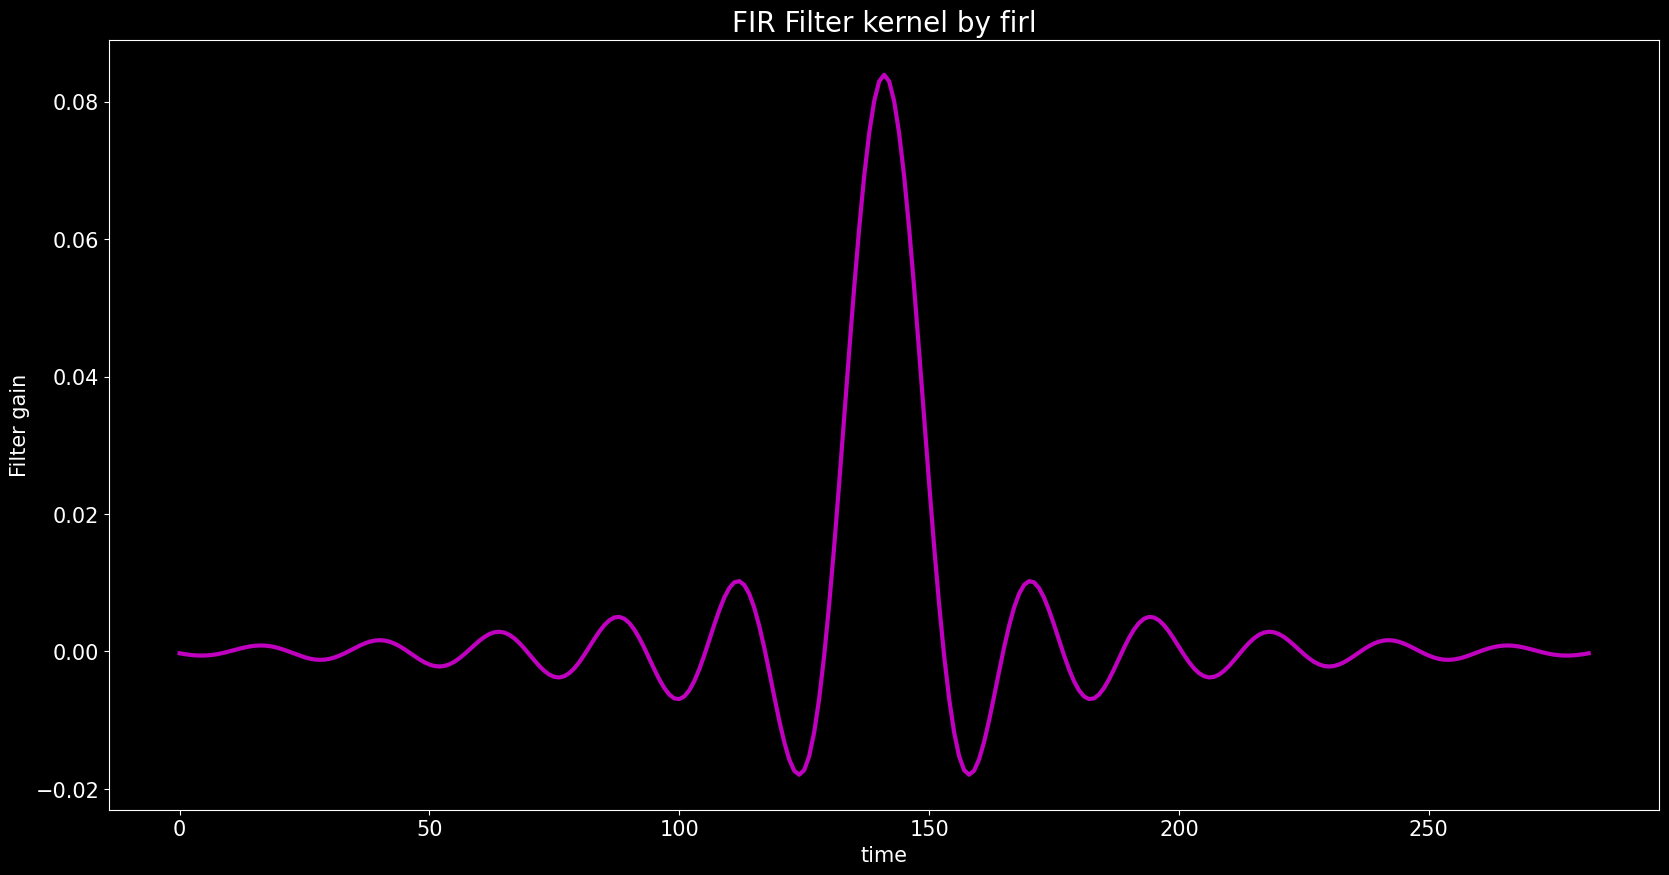

In [34]:
#filter kernel
filter_ker=signal.firls(order,frequencies1,desired_shape1,fs=srate)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(filter_ker,'m',linewidth=3)
plt.xlabel('time',fontsize=15)
plt.ylabel('Filter gain',fontsize=15)
plt.title('FIR Filter kernel by firl',fontsize=20)
plt.grid(False)
plt.show()

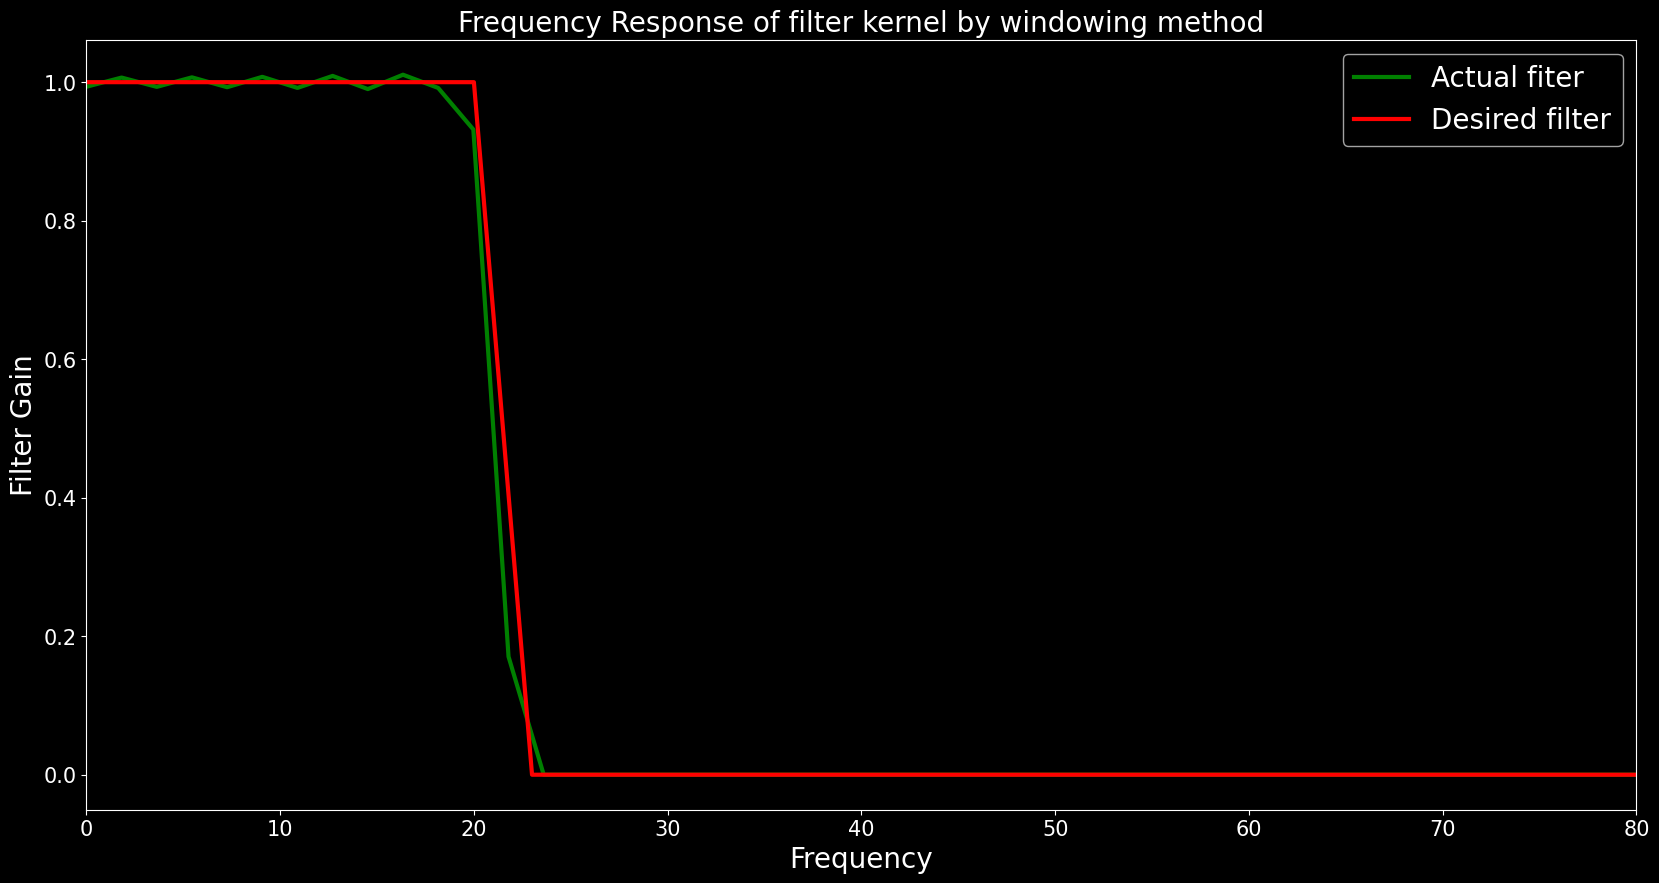

In [44]:
kernel_power=np.abs(scipy.fft.fft(filter_ker))**2
Hz=np.linspace(0,srate/2,int(np.floor(len(filter_ker)/2)+1))
kernel_power=kernel_power[0:len(Hz)] #firwin generates filter having no transition width.No shape input
plt.figure(figsize=(20,10)) #if True ,the gain at the frequency 0 (ie..,'DC gain') is 1 ,if false dc gain is 0  
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(Hz,kernel_power,'g',linewidth=3,label='Actual fiter')
plt.plot(frequencies1,desired_shape1,'r',linewidth=3,label='Desired filter')
plt.xlim([0,80])
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Filter Gain',fontsize=20)
plt.legend(fontsize=20)
plt.title('Frequency Response of filter kernel by windowing method',fontsize=20)
plt.show()

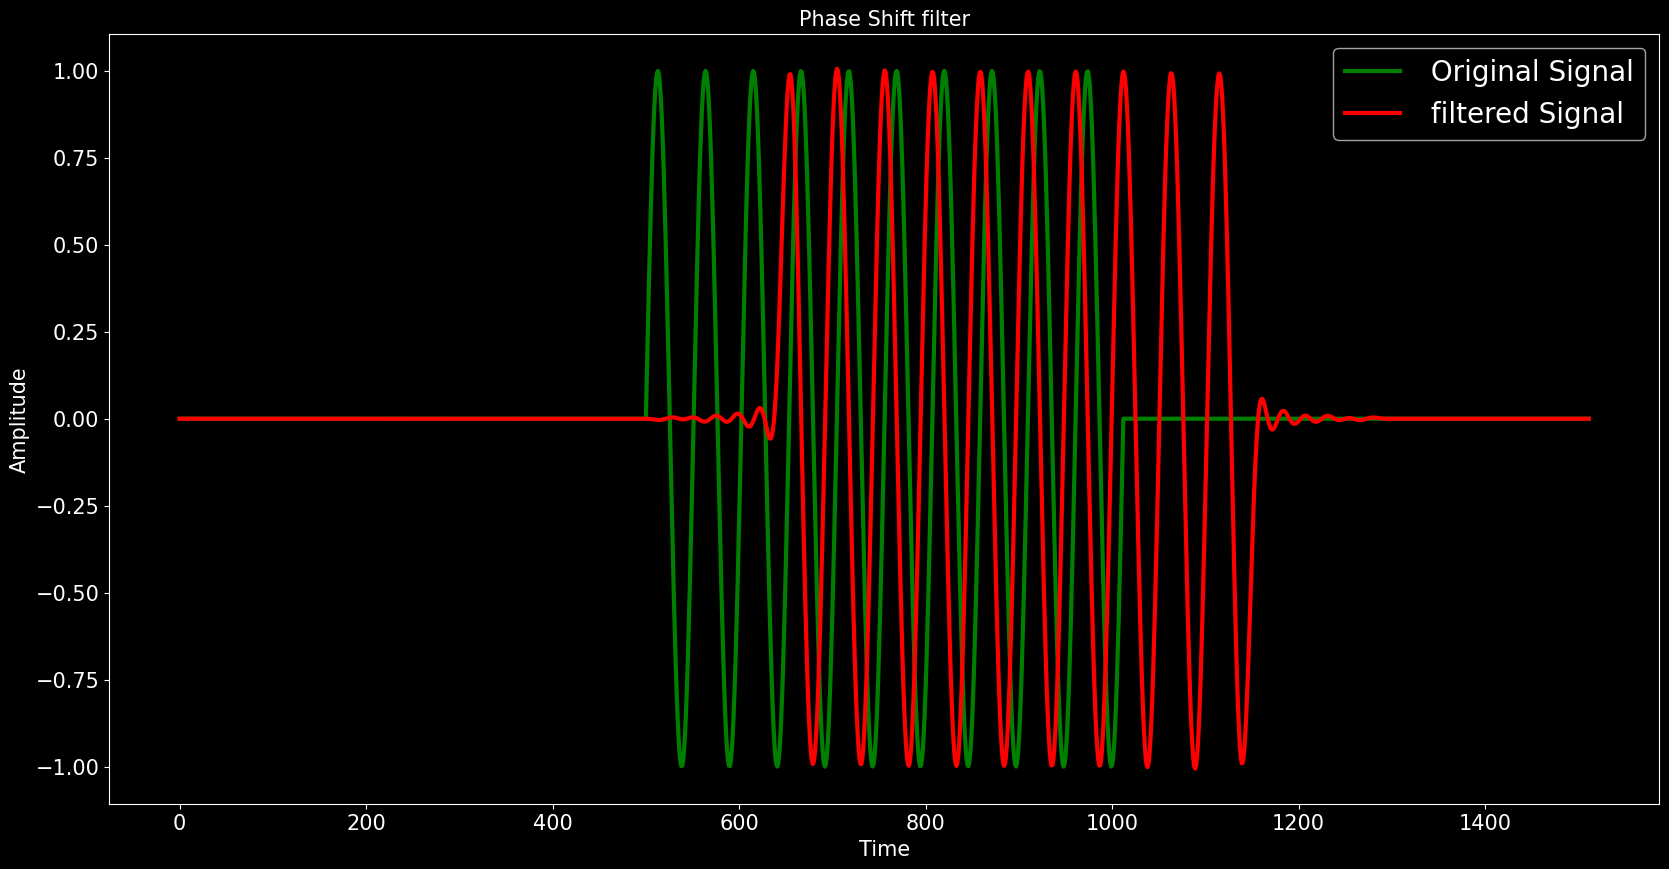

In [36]:
#filtering without zero phase shift
filt_sig =signal.lfilter(filter_ker,1,x)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(x,'g-',linewidth=3,label=' Original Signal')
plt.plot(filt_sig,'r-',linewidth=3,label=' filtered Signal')
plt.title('Phase Shift filter',fontsize=15)
plt.legend(fontsize=20)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.grid(False)
plt.show()



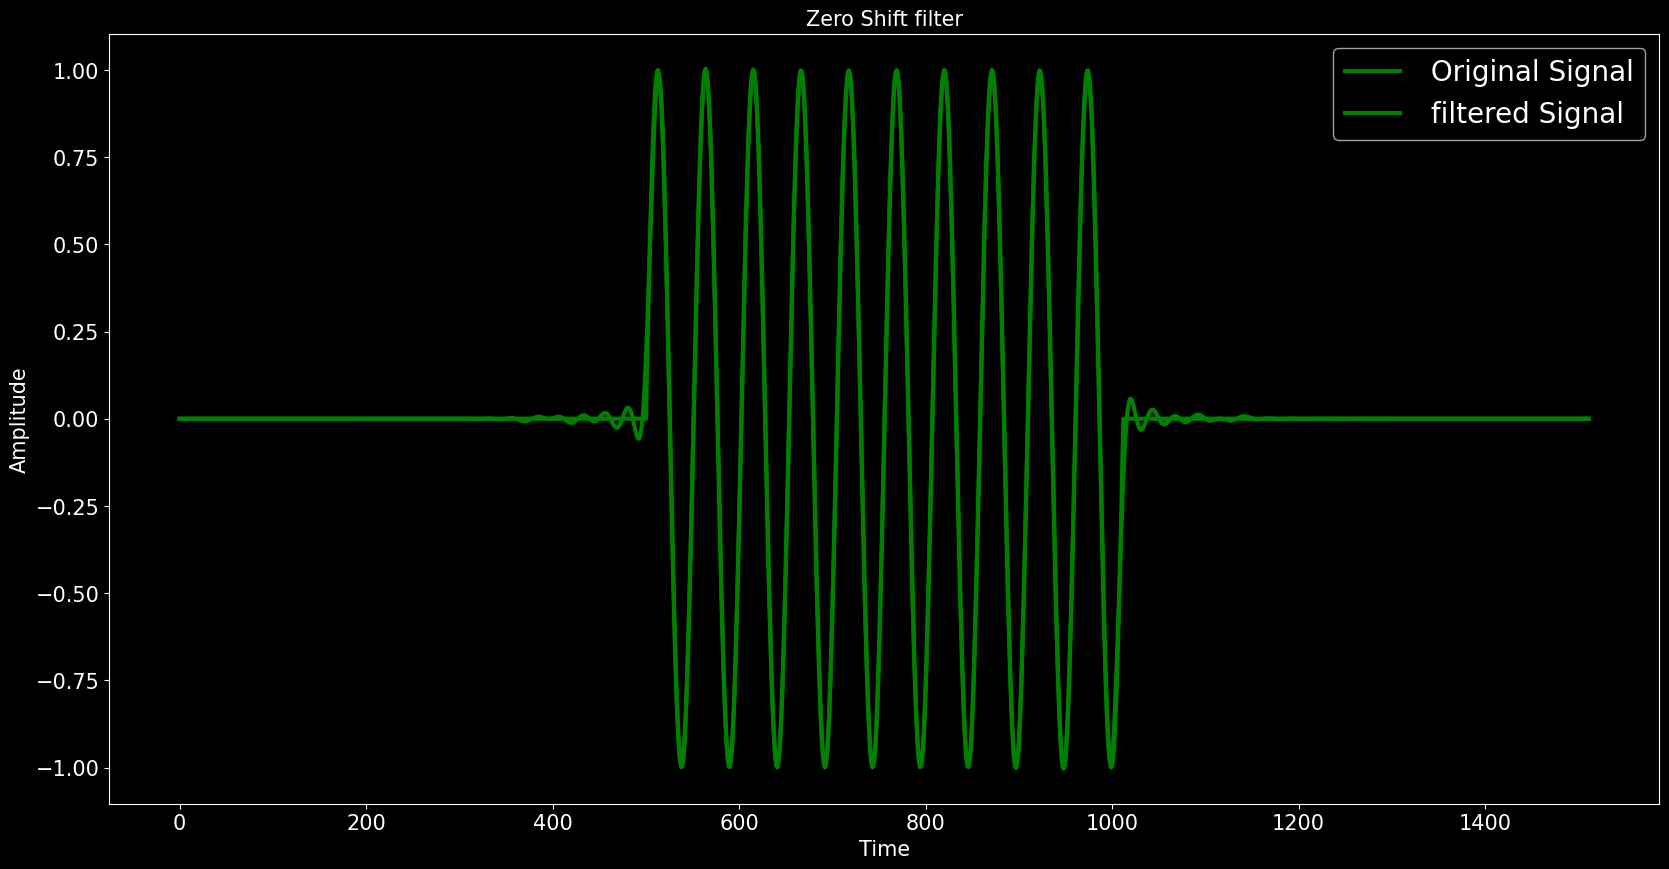

In [37]:
filt_sig =signal.filtfilt(filter_ker,1,x)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(x,'g-',linewidth=3,label=' Original Signal')
plt.plot(filt_sig,'g-',linewidth=3,label=' filtered Signal')
plt.title('Zero Shift filter',fontsize=15)
plt.legend(fontsize=20)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.grid(False)
plt.show()
plt.show()


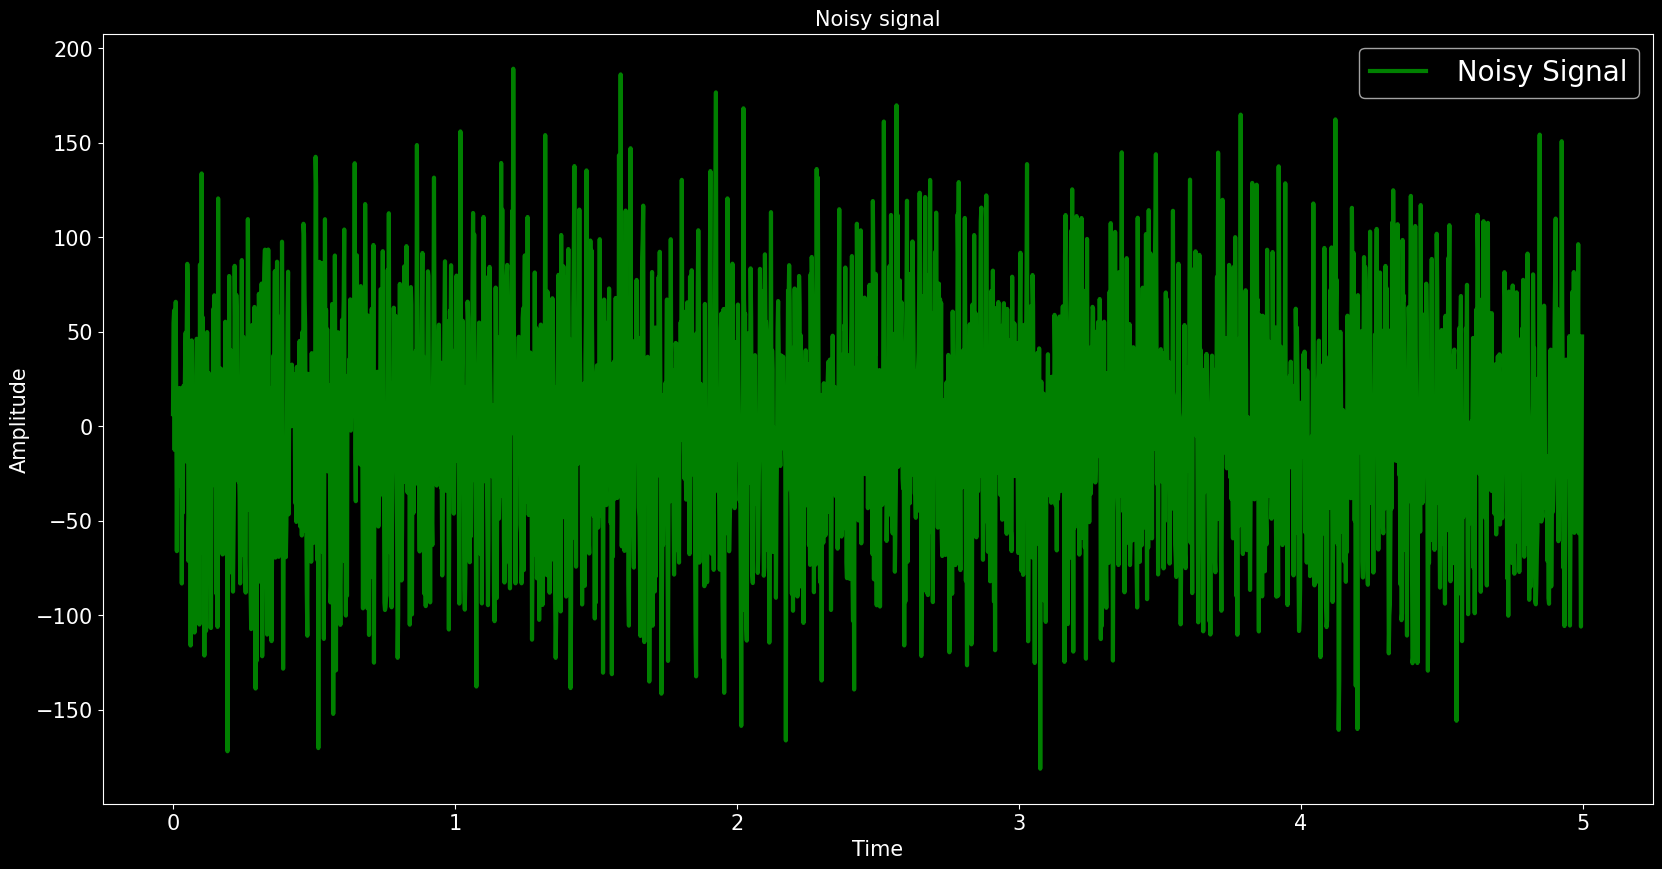

In [38]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
from scipy import signal
from matplotlib import style
srate=512
t=np.arange(0,5,1/srate)
pnts=len(t)
Nyquist=srate/2
x=40*np.sin(2*np.pi*50*t)
noise=50*np.random.randn(pnts)
Noisy_sig=noise+x 
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(t,Noisy_sig,'g-',linewidth=3,label=' Noisy Signal')
plt.title('Noisy signal',fontsize=15)
plt.legend(fontsize=20)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.show()
Noisy_sigX=np.abs(scipy.fft.fft(Noisy_sig)/pnts)**2
Hz=np.linspace(0,Nyquist,int(np.floor(pnts/2)+1))


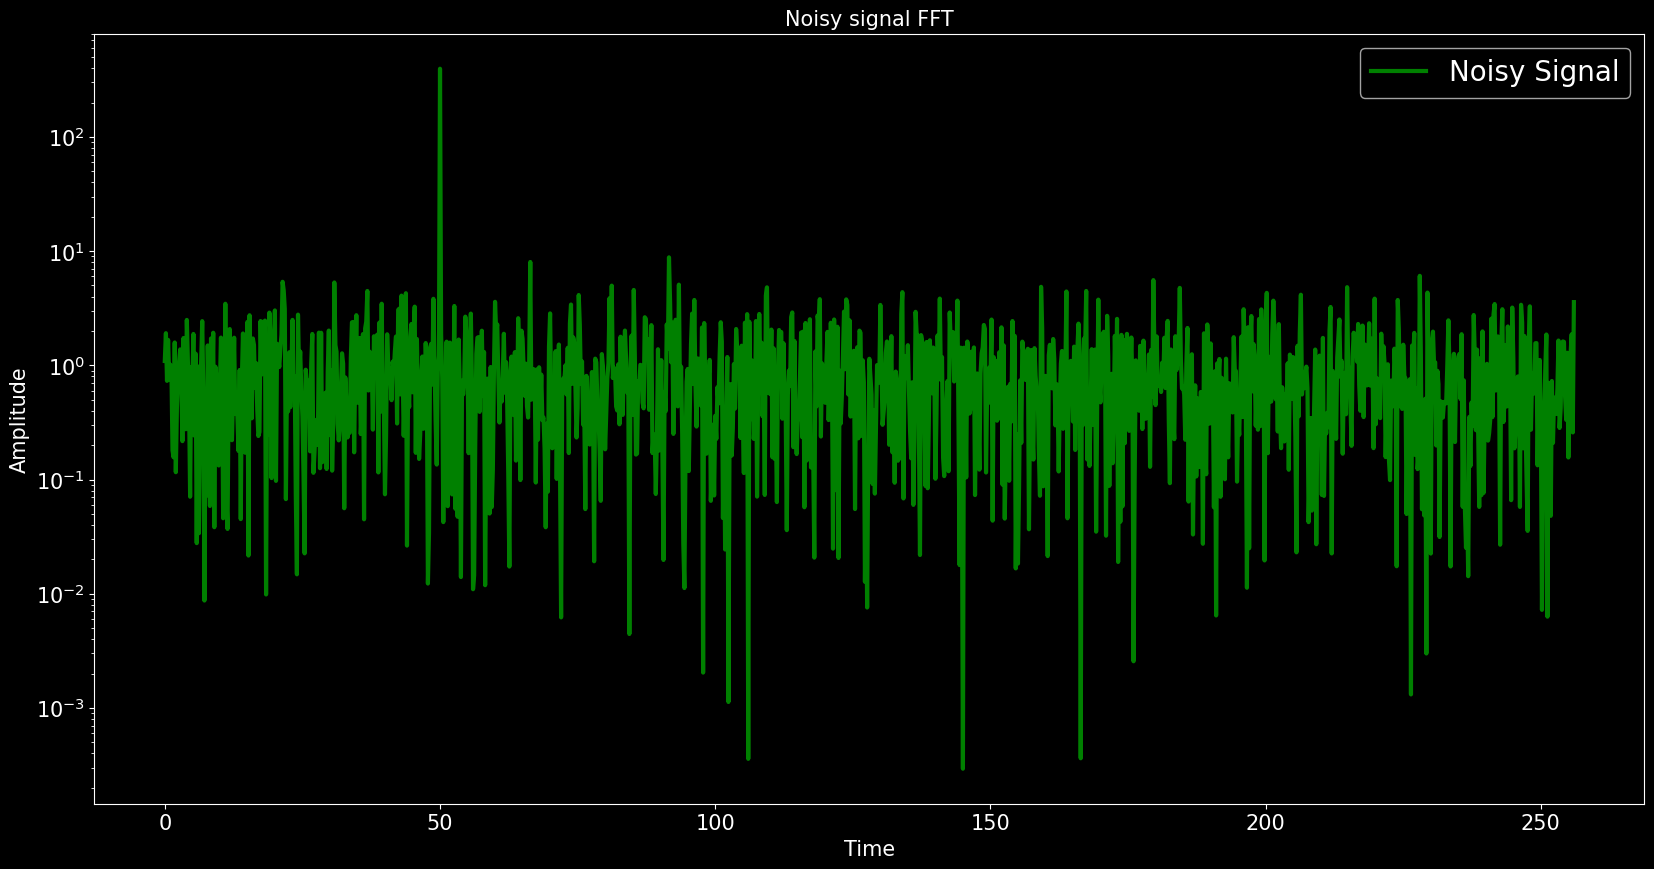

In [39]:
Noisy_sigX=np.abs(scipy.fft.fft(Noisy_sig)/pnts)**2
Hz=np.linspace(0,Nyquist,int(np.floor(pnts/2)+1))
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(Hz,Noisy_sigX[0:len(Hz)],'g',linewidth=3,label='Noisy Signal')
plt.title('Noisy signal FFT',fontsize=15)
plt.legend(fontsize=20)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.yscale('log')
plt.show() #maximum similiary when frequency prsesnt at noisy signal 

[0, 20, 23.0, 256.0]


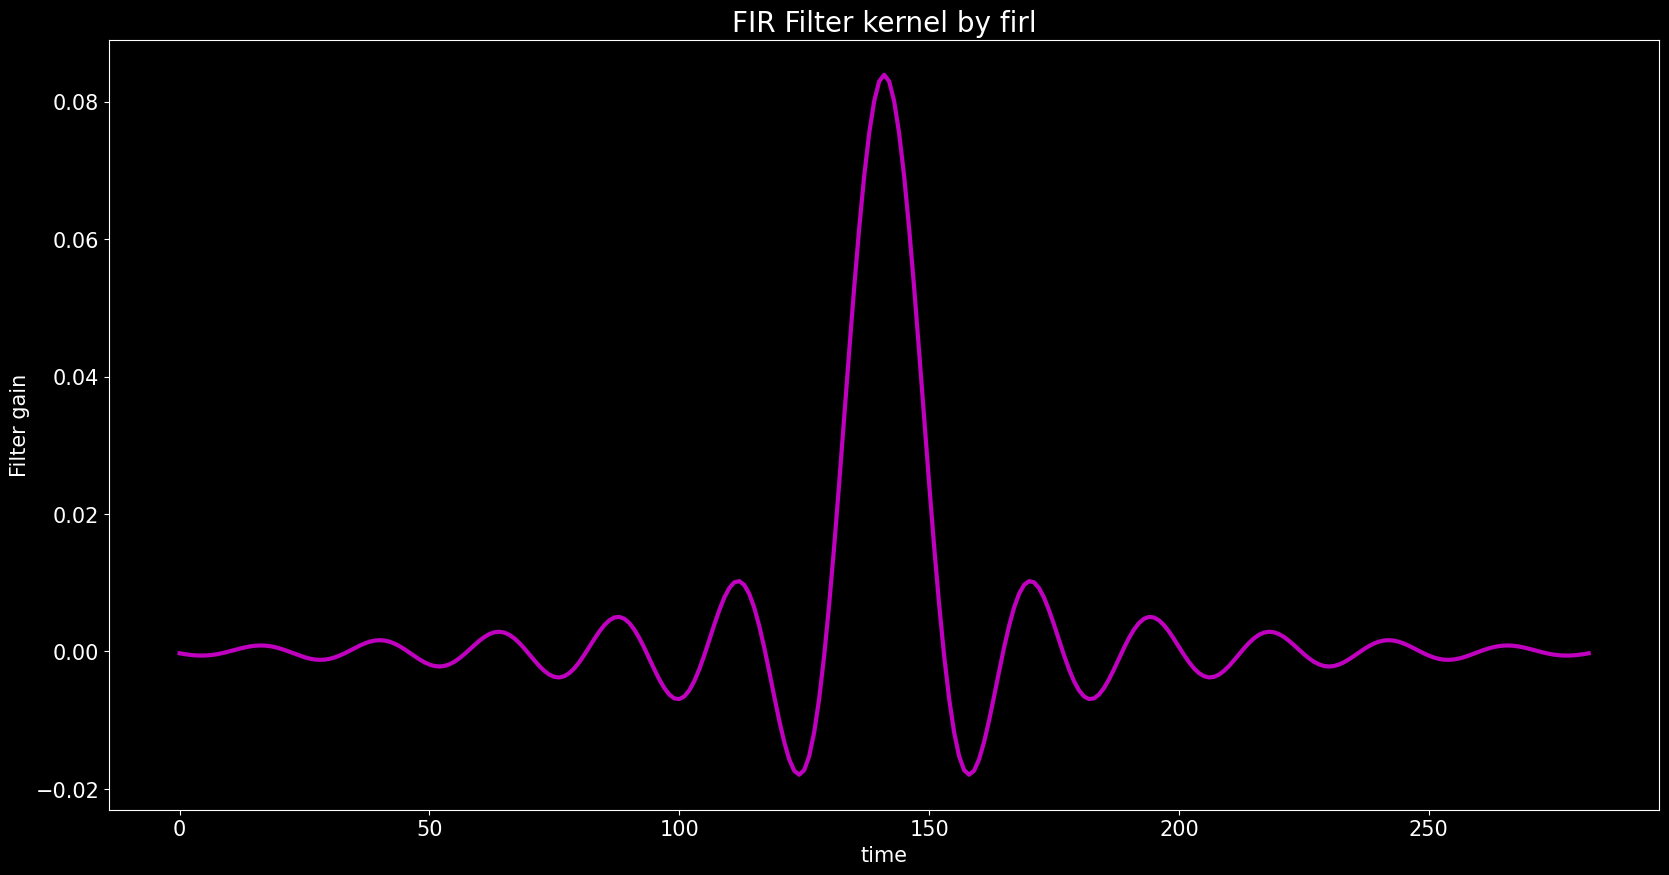

In [40]:
cutoff=20
transw=0.15
order=np.round(11*srate/cutoff)
if order %2 == 0:
    order +=1
desired_shape1=[1,1,0,0]
frequencies1=[0,cutoff,cutoff+cutoff*transw,Nyquist]
print(frequencies1)
filter_ker=signal.firls(order,frequencies1,desired_shape1,fs=srate)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(filter_ker,'m',linewidth=3)
plt.xlabel('time',fontsize=15)
plt.ylabel('Filter gain',fontsize=15)
plt.title('FIR Filter kernel by firl',fontsize=20)
plt.show()


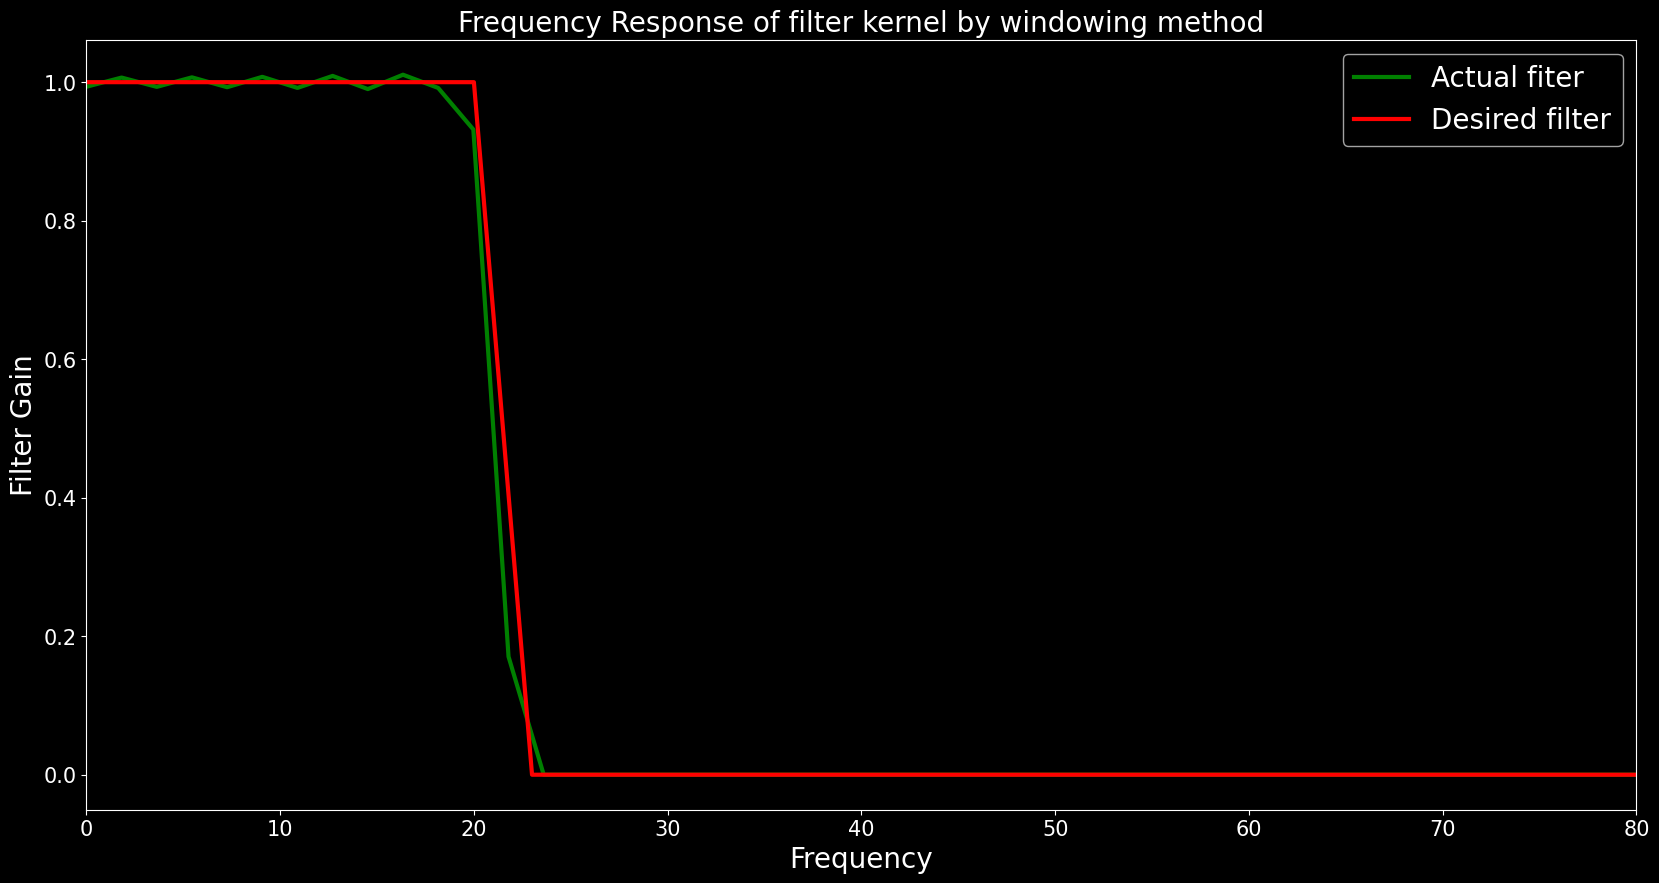

In [42]:
kernel_power=np.abs(scipy.fft.fft(filter_ker))**2
Hz=np.linspace(0,srate/2,int(np.floor(len(filter_ker)/2)+1))
kernel_power=kernel_power[0:len(Hz)] #firwin generates filter having no transition width.No shape input
plt.figure(figsize=(20,10)) #if True ,the gain at the frequency 0 (ie..,'DC gain') is 1 ,if false dc gain is 0  
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(Hz,kernel_power,'g',linewidth=3,label='Actual fiter')
plt.plot(frequencies1,desired_shape1,'r',linewidth=3,label='Desired filter')
plt.xlim([0,80])
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Filter Gain',fontsize=20)
plt.legend(fontsize=20)
plt.title('Frequency Response of filter kernel by windowing method',fontsize=20)
plt.show()

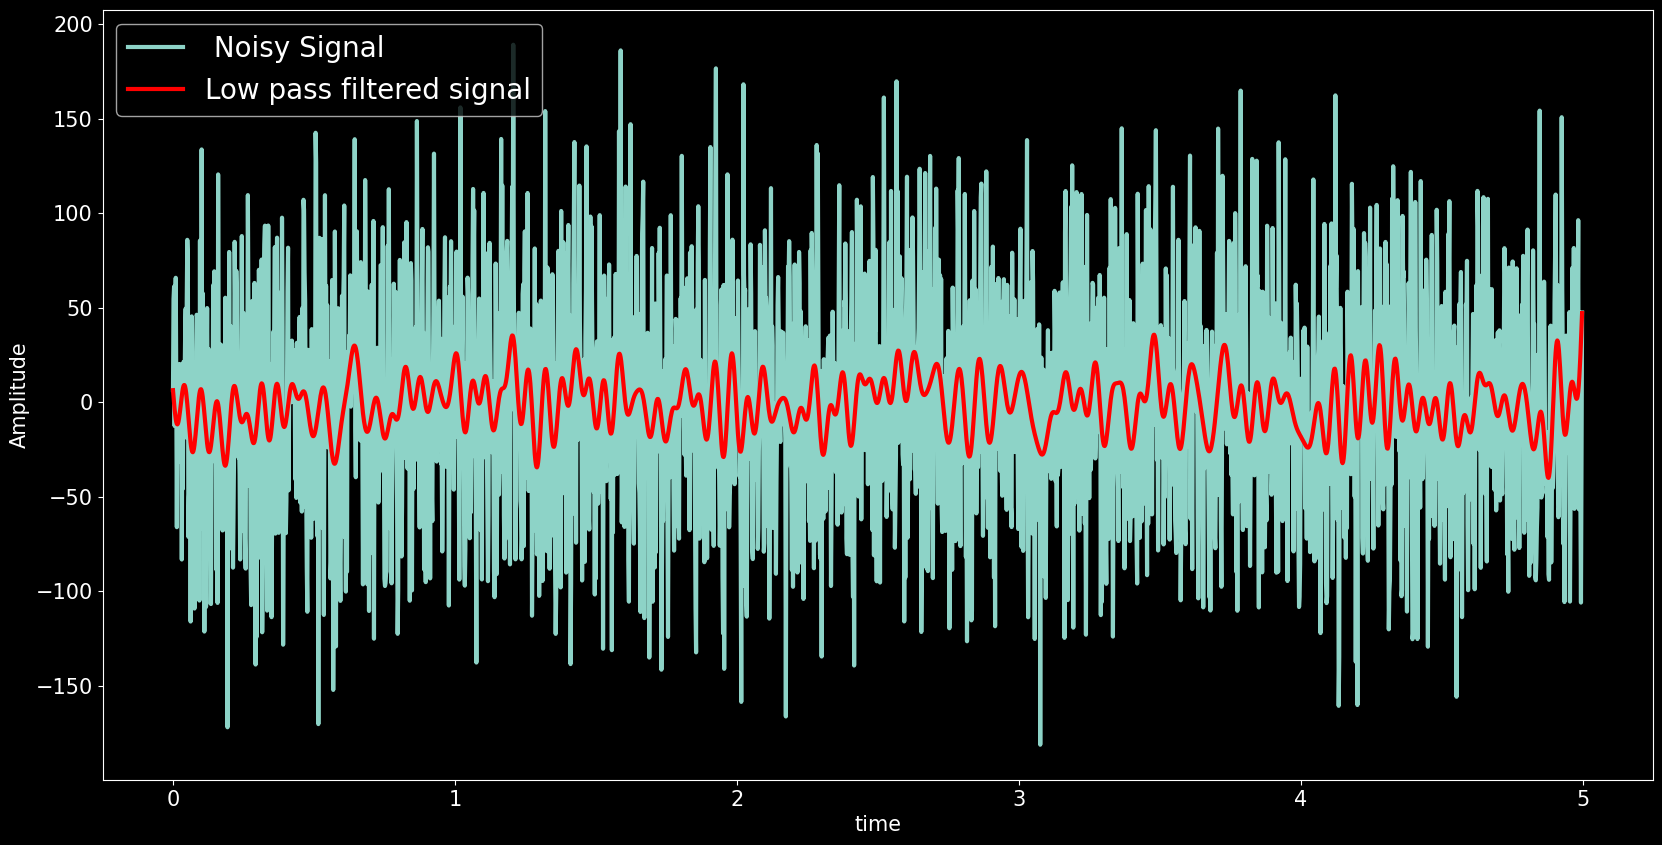

In [46]:
filt_sig=signal.filtfilt(filter_ker,1,Noisy_sig)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(t,Noisy_sig,linewidth=3,label=' Noisy Signal')
plt.plot(t,filt_sig,'r',linewidth=3,label='Low pass filtered signal')
plt.legend(fontsize=20)
plt.xlabel('time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.show()

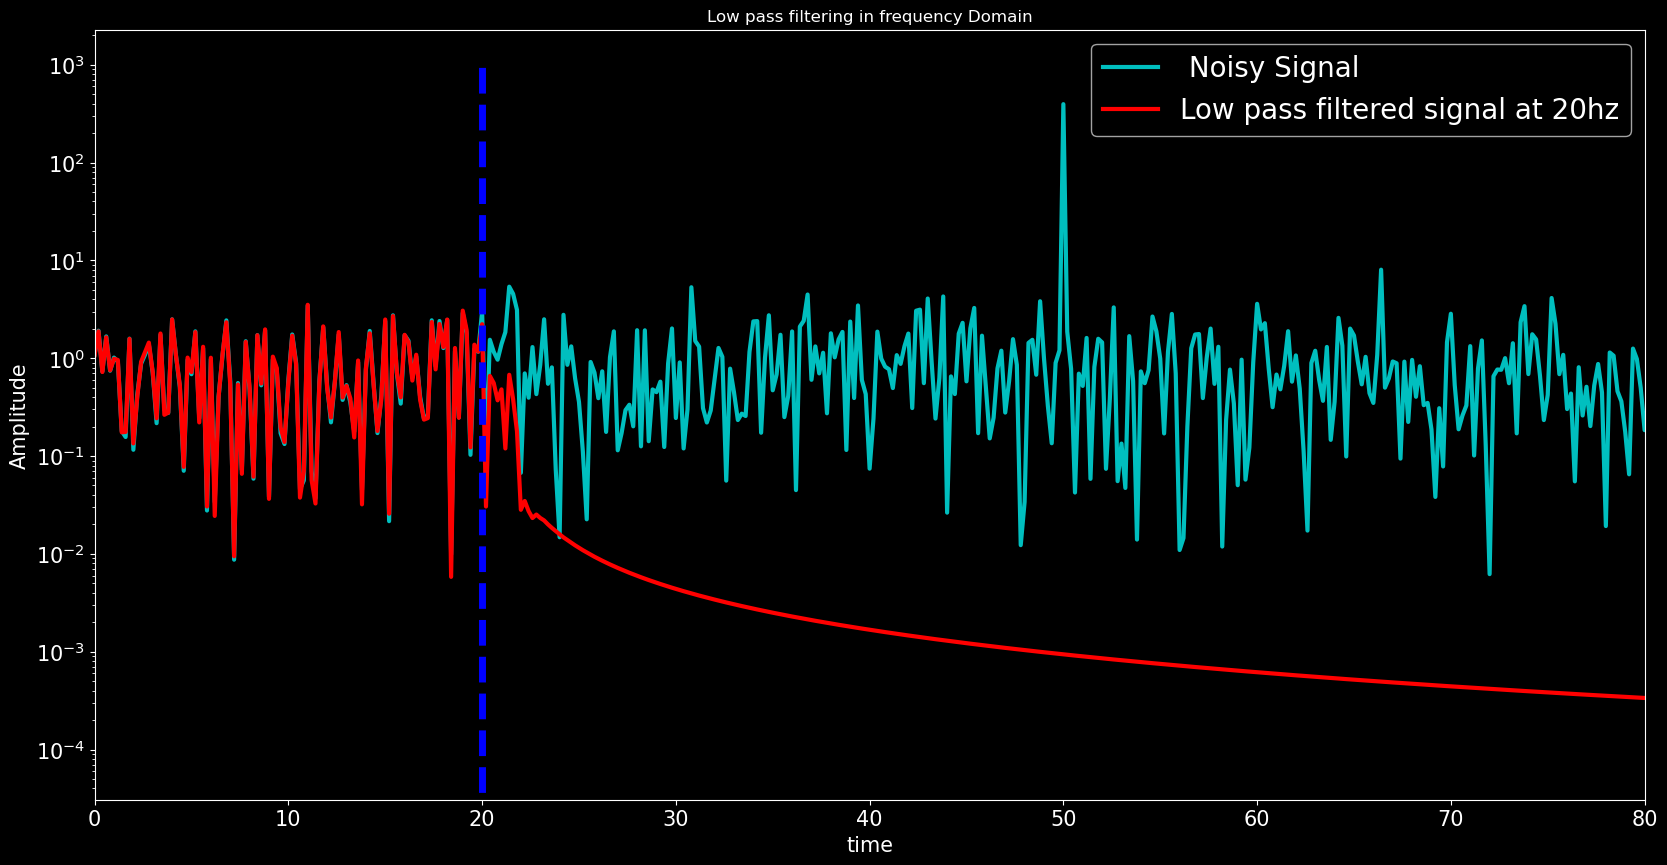

In [57]:
#power spectra of filtered and noisy signal
filt_sigX=np.abs(scipy.fft.fft(filt_sig)/pnts)**2
Noisy_sigX=np.abs(scipy.fft.fft(Noisy_sig)/pnts)**2
Hz=np.linspace(0,srate/2,int(np.floor(len(filt_sig)/2)+1))
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.plot(Hz,Noisy_sigX[0:len(Hz)],'c',linewidth=3,label=' Noisy Signal')
plt.plot(Hz,filt_sigX[0:len(Hz)],'r',linewidth=3,label='Low pass filtered signal at 20hz')
plt.plot([cutoff,cutoff],[0,1000],'b--',linewidth=5)
plt.xlim([0,80])
plt.title('Low pass filtering in frequency Domain')
plt.legend(fontsize=20)
plt.xlabel('time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.yscale('log')
plt.show()


